# Modelos de Regressão - Aula Prática 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Análise inicial dos dados
- Filtragem
- Definição das sequências
- Separação de dados treino e teste
- Treinamento de regressores
- Testes e validação
- Comparação entre regressores

In [48]:
df = pd.read_csv('IOT-temp.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [50]:
df.drop(['id', 'room_id/id'], axis=1, inplace=True)
df.head()

,noted_date,temp,out/in
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In


In [51]:
df_in  = df[df['out/in'] == 'In'].copy()
df_out = df[df['out/in'] == 'Out'].copy()

### Reset Index

In [52]:
df_in.reset_index(drop=True, inplace=True)
df_out.reset_index(drop=True, inplace=True)

### Ordena df

In [53]:
df_in['noted_date'] = pd.to_datetime(df_in['noted_date'])
df_in['noted_date'] = df_in['noted_date'].sort_values()

df_out['noted_date'] = pd.to_datetime(df_out['noted_date'])
df_out['noted_date'] = df_out['noted_date'].sort_values()

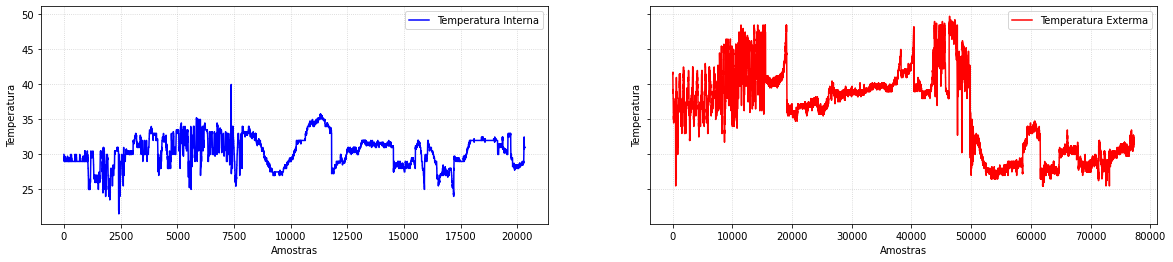

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True)

tamanho = -1
janela  = 4

ax[0].plot(df_in.index[:tamanho],  df_in['temp'].iloc[:tamanho].rolling(janela).mean(),  color='b', label='Temperatura Interna')
ax[1].plot(df_out.index[:tamanho], df_out['temp'].iloc[:tamanho].rolling(janela).mean(), color='r', label='Temperatura Exterma')

for i in range(2):
    ax[i].set_xlabel('Amostras')
    ax[i].set_ylabel('Temperatura')
    ax[i].grid(True, linestyle=':', alpha=0.6)
    ax[i].legend()

### Filtra df por média móvel

In [55]:
janela  = 4
df_in['temp']  = df_in['temp'].rolling(janela).mean()
df_out['temp'] = df_out['temp'].rolling(janela).mean()

### Remove valores nulos

In [56]:
df_in.dropna(inplace=True)
df_out.dropna(inplace=True)

### Removendo Colunas out/in e Noted_date

In [57]:
df_in.drop(['out/in', 'noted_date'], axis=1, inplace=True)
df_out.drop(['out/in', 'noted_date'], axis=1, inplace=True)

# Definindo Target

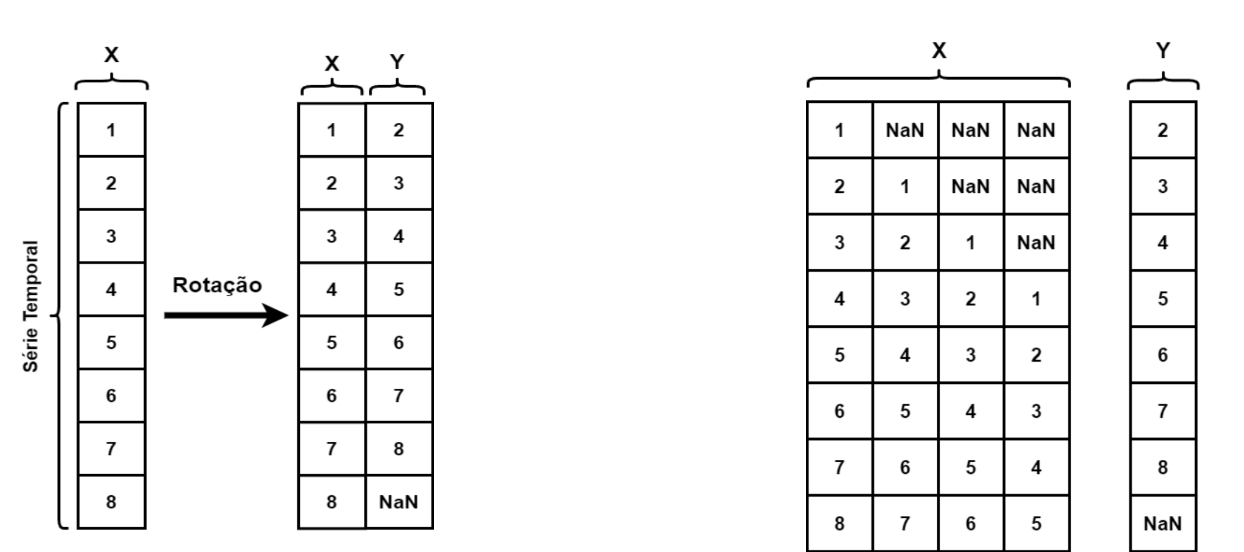

In [58]:
def rotaciona_df_passado(df, tamanho_janela):

    for i in range(1, tamanho_janela):
        df[f'temp -{i}'] = df['temp'].shift(i)
    df.dropna(inplace=True)
    return df

In [59]:
sequencia = 10
alvo      = 1

df_out_rotacionado      = rotaciona_df_passado(df_out, sequencia)
df_out_rotacionado['Y'] = df_out_rotacionado['temp'].shift(-alvo)
df_out_rotacionado.dropna(inplace=True)
df_out_rotacionado.head()

,temp,temp -1,temp -2,temp -3,temp -4,temp -5,temp -6,temp -7,temp -8,temp -9,Y
12,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.50
13,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.50
14,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.50
15,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.50
16,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.5,41.75


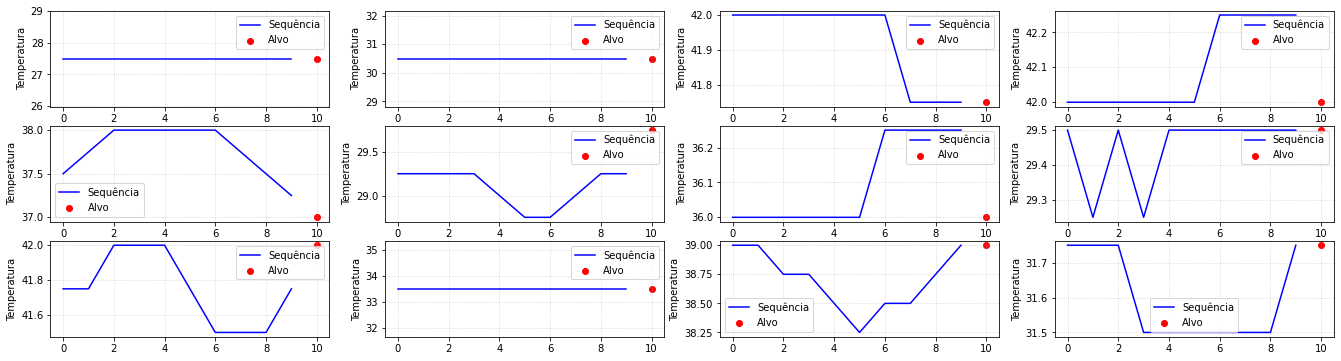

In [60]:
import random
nlinhas  = 3
ncolunas = 4
fig, ax = plt.subplots(nlinhas, ncolunas, figsize=(23, 6))
ax      = ax.flatten()

for i in range(nlinhas * ncolunas):
    index = random.randint(0, len(df_out_rotacionado))
    alvo  = df_out_rotacionado.iloc[index]['Y']
    seq   = df_out_rotacionado.iloc[index]
    seq   = np.array(seq.drop('Y').values)
    seq   = np.flip(seq)

    ax[i].plot(seq, color='b', label='Sequência')
    ax[i].scatter(sequencia, alvo, color='r', label='Alvo')
    ax[i].grid(True, linestyle=':', alpha=0.6)
    ax[i].set_ylabel('Temperatura')
    ax[i].legend()
      

# Normalizar dados

In [61]:
from sklearn.preprocessing import MinMaxScaler

norm    = MinMaxScaler()
df_norm = norm.fit_transform(df_out_rotacionado.values)
df_norm = pd.DataFrame(df_norm, columns=df_out_rotacionado.columns)
df_norm 

,temp,temp -1,temp -2,temp -3,temp -4,temp -5,temp -6,temp -7,temp -8,temp -9,Y
0,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794
1,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794
2,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794
3,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794
4,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.659794,0.670103
...,...,...,...,...,...,...,...,...,...,...,...
77243,0.257732,0.268041,0.268041,0.268041,0.278351,0.268041,0.257732,0.257732,0.247423,0.247423,0.268041
77244,0.268041,0.257732,0.268041,0.268041,0.268041,0.278351,0.268041,0.257732,0.257732,0.247423,0.268041
77245,0.268041,0.268041,0.257732,0.268041,0.268041,0.268041,0.278351,0.268041,0.257732,0.257732,0.268041
77246,0.268041,0.268041,0.268041,0.257732,0.268041,0.268041,0.268041,0.278351,0.268041,0.257732,0.268041


# Separação X e Y

In [62]:
Y = df_norm['Y']
df_norm.drop('Y', axis=1, inplace=True)
X = df_norm.values

## Separação dados Treino e Teste

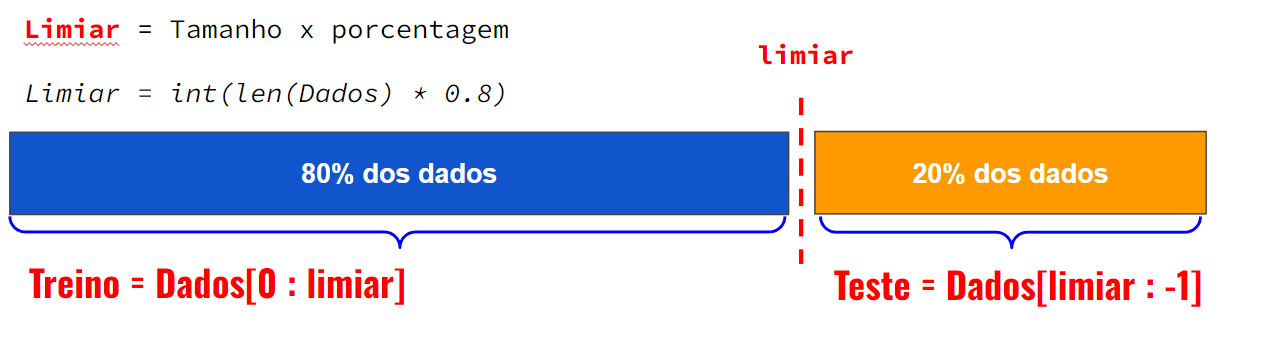

In [63]:
limiar = int(len(X) * 0.8)

x_treino = X[0 : limiar]
y_treino = Y[0 : limiar]

x_teste  = X[limiar: ]
y_teste  = Y[limiar: ]

In [64]:
print(f'Tamanho dos dados treino são iguais? {len(x_treino) == len(y_treino)}')
print(f'Tamanho dos dados teste são iguais? {len(x_teste) == len(y_teste)}')

Tamanho dos dados treino são iguais? True
Tamanho dos dados teste são iguais? True


## Regressão linear

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_treino, y_treino)

LinearRegression()

In [66]:
lr_predito = lr.predict(x_teste)
lr_predito

array([0.09411386, 0.10817465, 0.1046075 , ..., 0.26611538, 0.2727561 ,
       0.26390752])

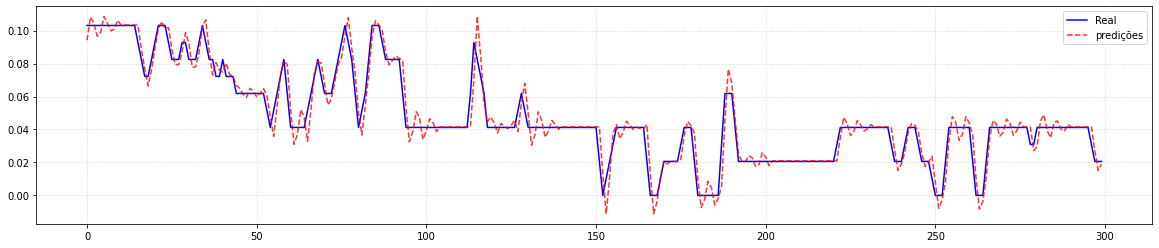

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

indices = list(range(len(x_teste)))
fatia   = 300

ax.plot(indices[:fatia], y_teste[:fatia], label='Real', color='b')
ax.plot(indices[:fatia], lr_predito[:fatia], label='predições', color='r', linestyle='--', alpha=0.8)
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend()

## Metricas de avaliação

In [68]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math

## MSE

In [69]:
erro_mse = mse(lr_predito, y_teste)
erro_mse

4.057916223914244e-05

## MAE


In [70]:
erro_mae  = mae(lr_predito, y_teste)
erro_mae

0.004291801810059546

## RMSE

In [71]:
erro_rmse = math.sqrt(mse(lr_predito, y_teste))
erro_rmse

0.006370177567316507

# Comparando Regressores

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [73]:
regressores = { 
    'RL'   : LinearRegression(),
    'SGD'  : SGDRegressor(),
    'KNN'  : KNeighborsRegressor(),
    'SVR'  : SVR(),
    # 'Lasso': Lasso(), 
    # 'Ada'  : AdaBoostRegressor(),
    # 'RF'   : RandomForestRegressor()
}

In [74]:
import time

mses   = {}
maes   = {}
rmses  = {}
tempos = {}

for reg in regressores.keys():
    t_start = time.process_time()
    regressores[reg].fit(x_treino, y_treino)
    t_fim   = time.process_time()
    tempos[reg] = t_fim - t_start
    predicoes   = regressores[reg].predict(x_teste)
    mses[reg]   = mse(predicoes, y_teste)
    maes[reg]   = mae(predicoes, y_teste)
    rmses[reg]  = math.sqrt(mse(predicoes, y_teste))

## Visualizando MSE e TEMPO treinamento

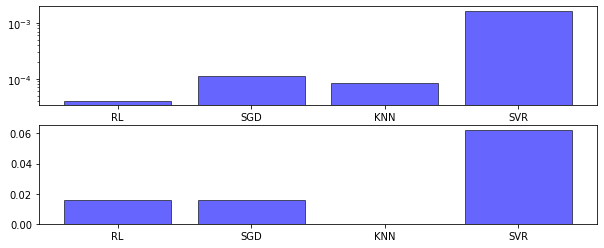

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4))
ax      = ax.flatten()

ax[0].bar(mses.keys(),  mses.values(), color='b', alpha=0.6, label='MSE', ec='k')
ax[1].bar(tempos.keys(), tempos.values(), color='b', alpha=0.6, label='TEMPO', ec='k')
ax[0].set_yscale('log')
# ax[1].set_yscale('log')

## RSME

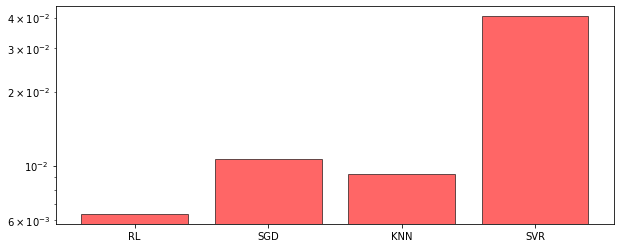

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.bar(rmses.keys(), rmses.values(), color='r', alpha=0.6, label='MSE', ec='k')
ax.set_yscale('log')

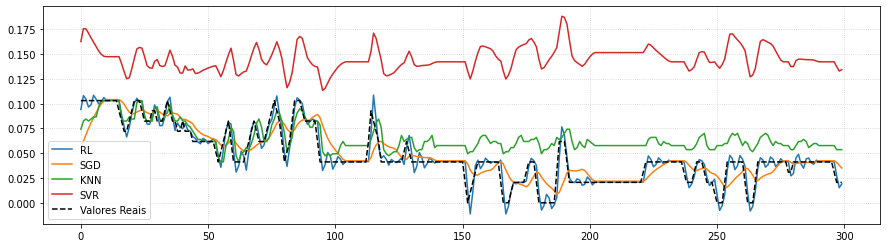

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
indices = list(range(len(x_teste)))
fatia   = 300

for reg in regressores.keys():
    regressores[reg].fit(x_treino, y_treino)
    predicoes  = regressores[reg].predict(x_teste)
    ax.plot(indices[:fatia], predicoes[:fatia], label=reg)

ax.plot(indices[:fatia], y_teste[:fatia], label='Valores Reais', color='k', linestyle='--')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)

## Fazer o mesmo processo para o df_in